In [1]:
%run Plot-Functions.ipynb

In [2]:
mpl.rc('xtick',labelsize=16,)
mpl.rc('ytick',labelsize=16,)
mpl.rc('axes',labelsize=20,)

In [4]:
f_TC = path+'TC_change_2035_ha.nc'

In [5]:
f_FC = path+'Dryland_Reconstruct_Reforest_area_ha_0.5deg.nc'

In [6]:
TC = xr.open_dataset(f_TC)

In [7]:
FC = xr.open_dataset(f_FC)

In [16]:
# Aridity Index masked drylands
AI = open_ai()

# Interpolate to model resolution
dryland_mask = AI.interp_like(TC,method='nearest')

flip lat


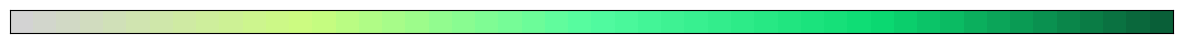

In [22]:
veg= make_Ramp(['lightgrey','#ccfd7f','#53fca1','#0cdc73','#0a5f38'],
              plot_cbar=True)

In [23]:
plt_data = FC['RS_area'].where(FC['RS_area']!=0)*1e-6

F:\Conda\envs\work\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


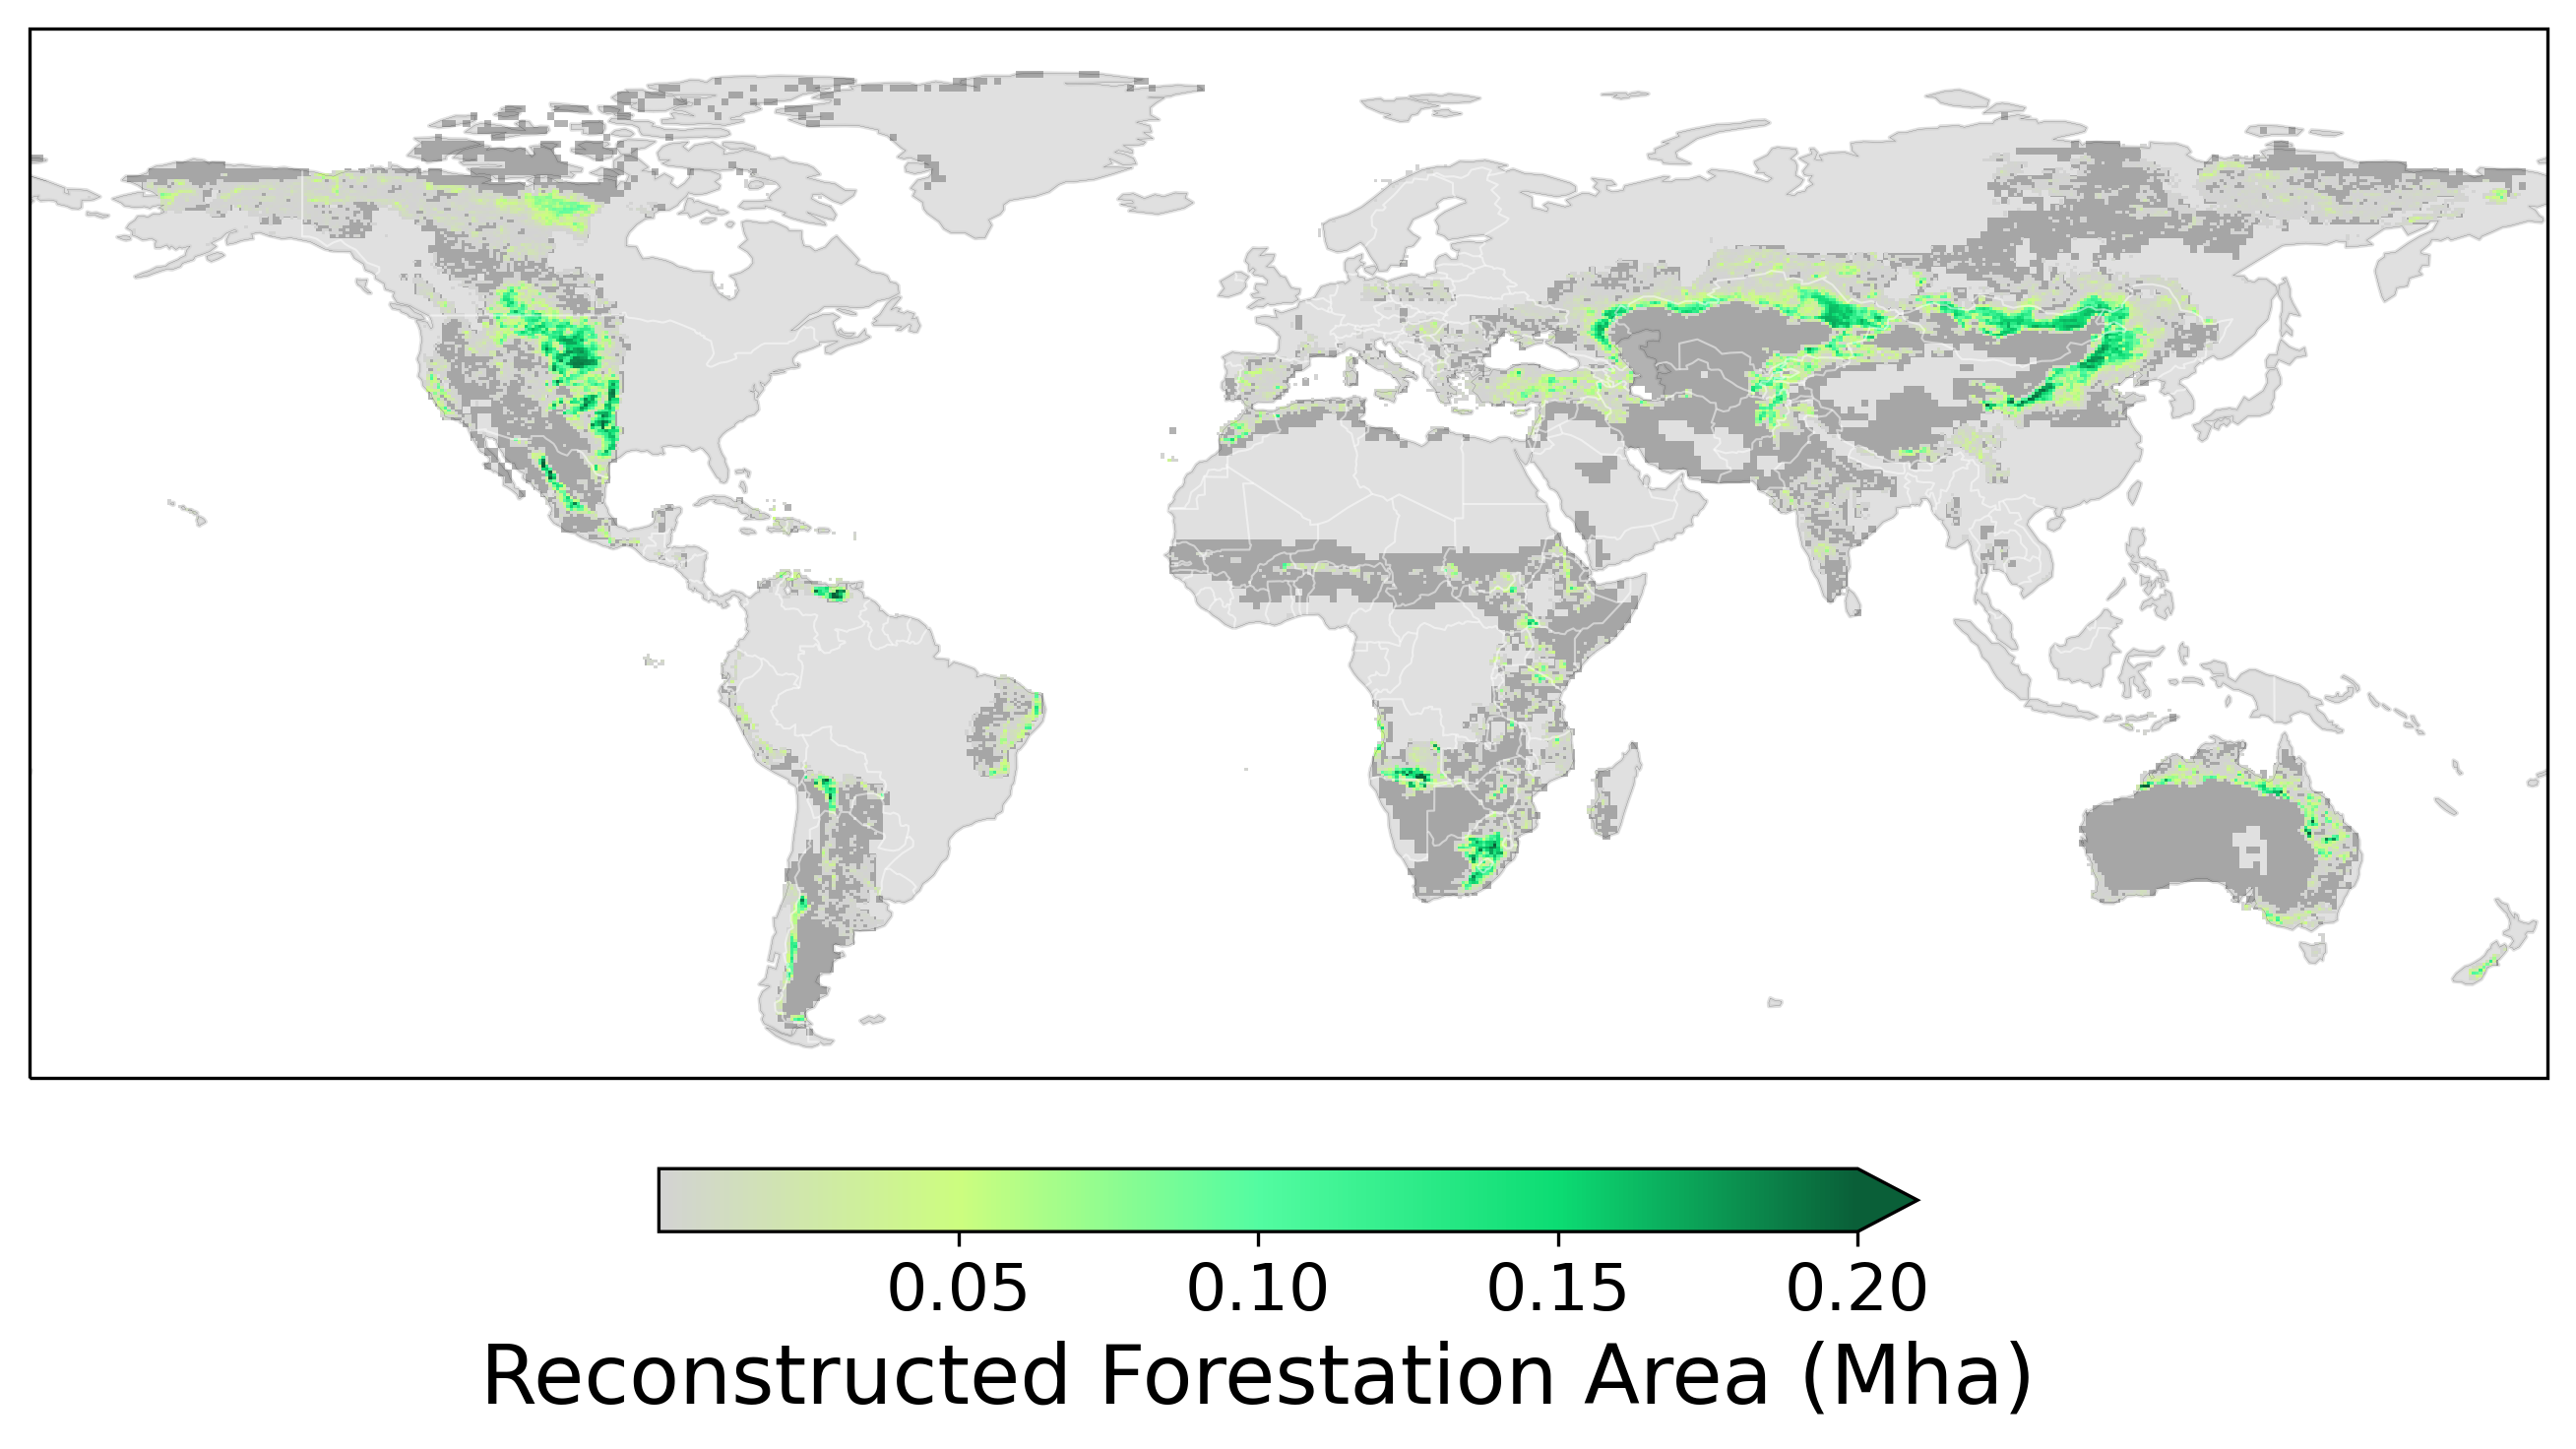

In [47]:
fig=plt.figure(figsize=(11,10),dpi=300)
ax =fig.add_subplot(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,color='lightgrey',alpha=.7)
ax.add_feature(cfeature.BORDERS,color='white',lw=.5,alpha=.5,zorder=2)
ax.coastlines(color='k',lw=.05,alpha=.7)

AI.plot(cmap=grey,alpha=.6,add_colorbar=False)
plt_data.plot(cmap=veg,
              vmax=.2,
              cbar_kwargs={'ax':ax,
                           'pad':.04,
                           'shrink':.5,
                           'orientation':'horizontal',
                           'label':'Reconstructed Forestation Area (Mha)',})

plt.savefig(path+'Figures\\Reconstructed_TC.png',bbox_inches='tight')

In [36]:
lat,lon=dryland_mask.lat.values,dryland_mask.lon.values

In [42]:
mpl.rcParams['hatch.linewidth'] = 0.5

F:\Conda\envs\work\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


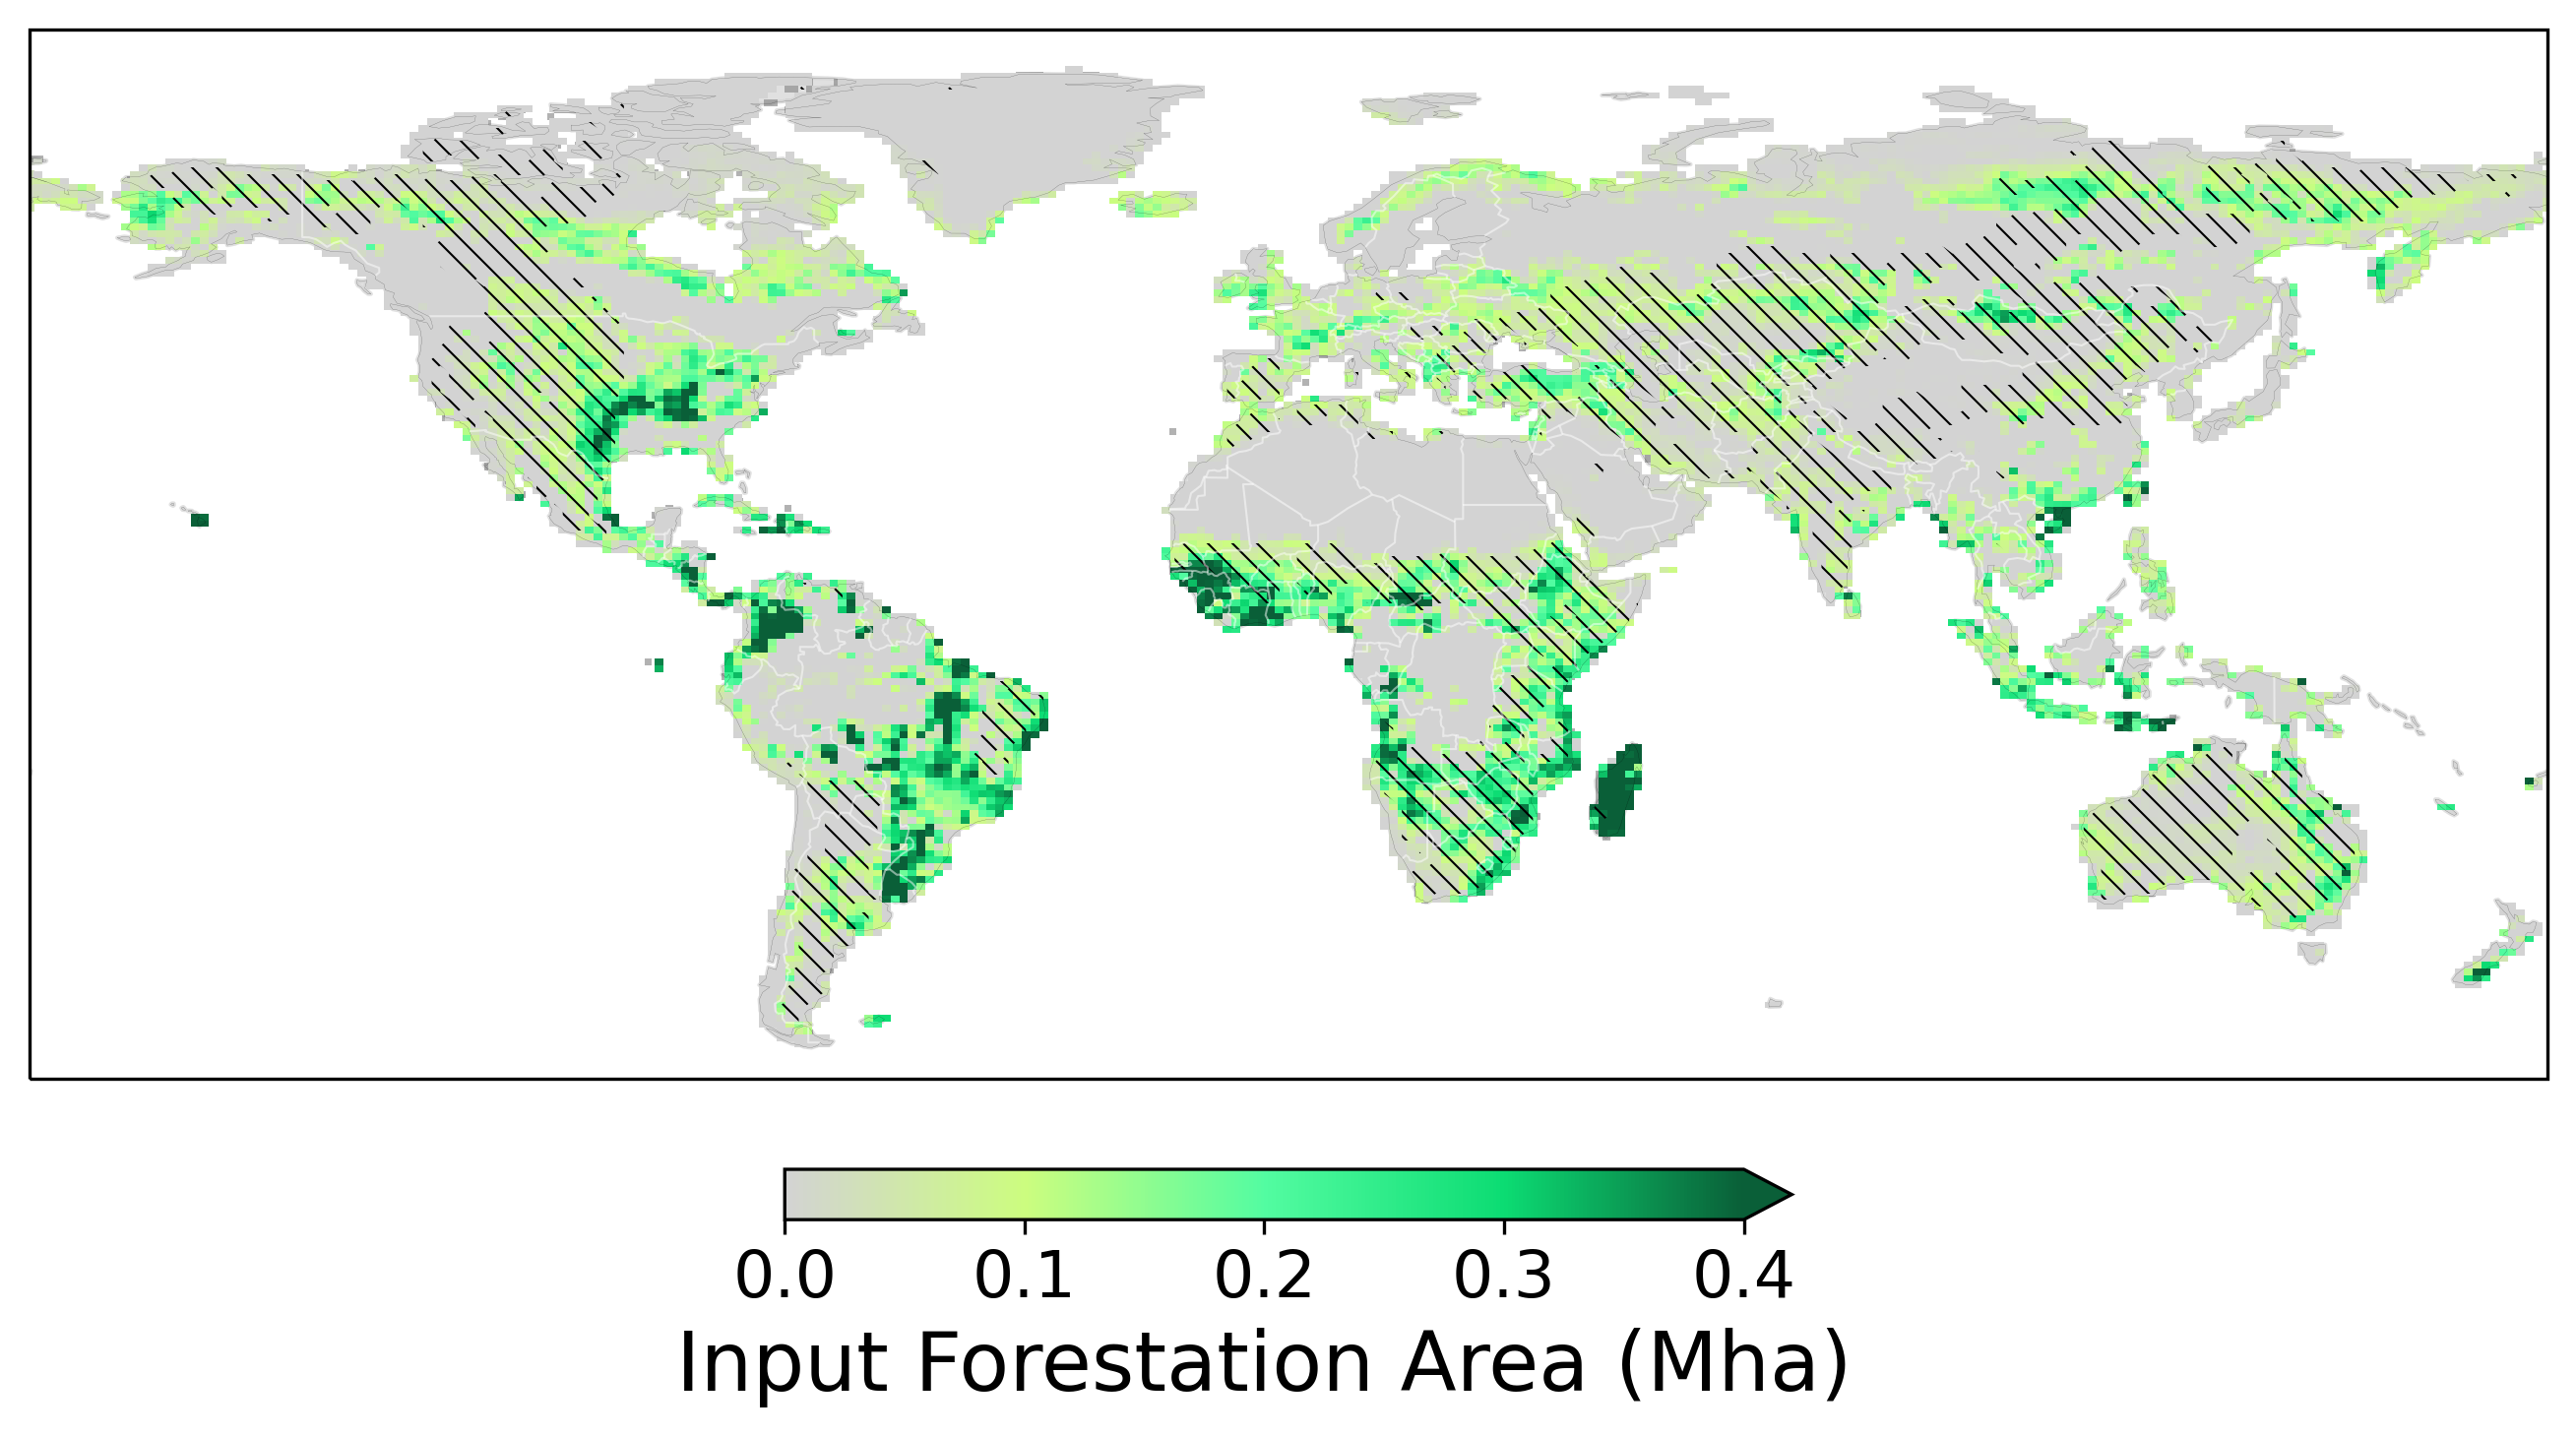

In [48]:
fig=plt.figure(figsize=(11,10),dpi=300)
ax =fig.add_subplot(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,color='lightgrey',alpha=.7)
ax.add_feature(cfeature.BORDERS,color='white',lw=.5,alpha=.5,zorder=2)
ax.coastlines(color='k',lw=.05,alpha=.7)

AI.plot(cmap=grey,alpha=.6,add_colorbar=False)


(TC['TC']*1e-6).plot(cmap=veg,
              vmax=.4,
              cbar_kwargs={'ax':ax,
                           'pad':.04,
                           'shrink':.4,
                           'orientation':'horizontal',
                           'label':'Input Forestation Area (Mha)',})

ax.contourf(lon,
            lat,
            dryland_mask,
            colors='none',
            hatches=['\\\\\\\\'],)

plt.savefig(path+'Figures\\Potential_TC.png',bbox_inches='tight')